In [515]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy import stats
import math

In [651]:
original = pd.read_excel('./perfo.xlsx', header=1)
original['날짜'] = pd.to_datetime(original['방송일시']).dt.date
original = original[original['상품군']!='무형'] 

- 외부데이터 추가한 train

In [518]:
train = pd.read_excel('./train.xlsx')
train = train[train['판매단가'] < train['취급액']]

In [519]:
train['노출(분)'] = train['노출(분)'].replace(0, math.nan)
train['노출(분)'] = train['노출(분)'].fillna(method='ffill')

- 외부데이터 추가 안한 train

In [601]:
total = pd.read_excel('./perfo.xlsx', header=1)
total = total[total['상품군']!='무형'] 
total = total[total['판매단가'] < total['취급액']]
total['날짜'] = pd.to_datetime(total['방송일시']).dt.date
total['날짜'] = pd.to_datetime(total['날짜'])
total['주문량'] = total['취급액']/total['판매단가']
total["요일"]=total["방송일시"].dt.dayofweek # 요일
total["시"]=total["방송일시"].dt.hour # 시
total['월'] = total['방송일시'].dt.month # 월

In [520]:
data = pd.read_excel('./perfo.xlsx', header=1)
data = data[data['상품군']!='무형'] 
data = data[data['판매단가'] < data['취급액']]
data['날짜'] = pd.to_datetime(data['방송일시']).dt.date
data['날짜'] = pd.to_datetime(data['날짜'])
data['주문량'] = data['취급액']/data['판매단가']
data["요일"]=data["방송일시"].dt.dayofweek # 요일
data["시"]=data["방송일시"].dt.hour # 시
data['월'] = data['방송일시'].dt.month # 월
weekday = {"월":0,"화":1,"수":2,"목":3,"금":4,"토":5,"일":6}

In [521]:
#data[data['DATE']==pd.to_datetime('2019-06-15')].head(1)
#data[data['DATE']==pd.to_datetime('2019-08-31')].tail(1)

In [522]:
data = data.fillna(method='ffill')

In [523]:
data = data.iloc[17604:25792]

- test

In [634]:
test = pd.read_excel('./test.xlsx', header=1)

# validation set

- 계절성 확인

In [602]:
total['계절'] = 0

In [606]:
for i in total.index:
    if 3 <= total['월'][i] <= 5:
        total['계절'][i] = 1
    elif 6 <= total['월'][i] <= 8:
        total['계절'][i] = 2
    elif 9 <= total['월'][i] <= 11:
        total['계절'][i] = 3
    else:
        total['계절'][i] = 4

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  f

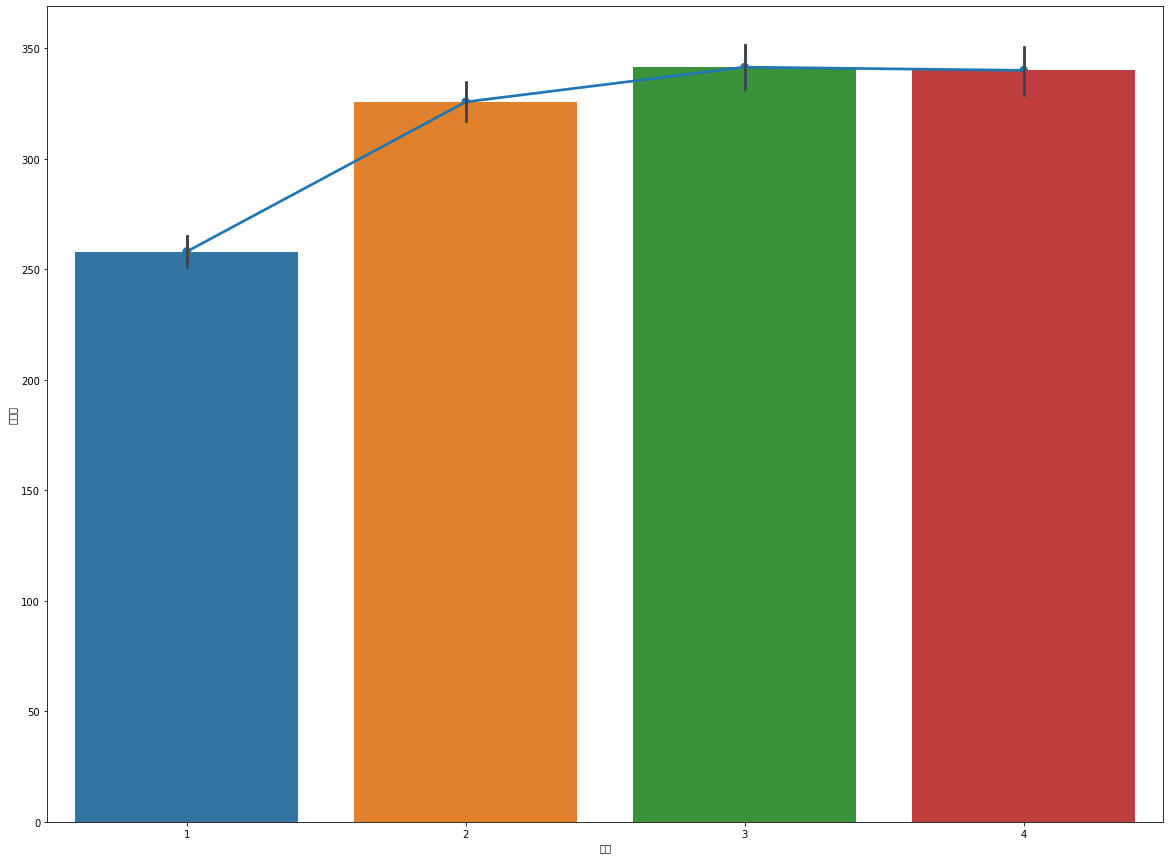

In [607]:
#계절별 주문량 그래프 3(가을)에 제일 많고 1(봄)에 제일 적다.
sns.pointplot(data=total,x="계절",y="주문량") 
sns.barplot(data=total,x="계절",y="주문량")

- test set과의 일치율

In [668]:
data_2020 = pd.DataFrame()

In [669]:
item = original['상품군'].unique()
data_2020['category'] = item

In [670]:
prop2020 = []
num2020 = test['상품군'].value_counts()
tot2020 = test['상품군'].value_counts().sum()

for i in item:
    prop2020.append(num2020[i]/tot2020)

data_2020['prop'] = prop2020

In [706]:
def propo(index, breakpoint):
    x = 0
    data_2020['compare']=0

    for i in range(len(original)):
        if str(original['날짜'].iloc[i]) == breakpoint:
            break
        else:
            x+=1
            if original['상품군'].iloc[i+index] == '의류':
                data_2020['compare'][0]+=1
            elif original['상품군'].iloc[i+index] == '속옷':
                data_2020['compare'][1]+=1
            elif original['상품군'].iloc[i+index] == '주방':
                data_2020['compare'][2]+=1 
            elif original['상품군'].iloc[i+index] == '농수축':
                data_2020['compare'][3]+=1
            elif original['상품군'].iloc[i+index] == '이미용':
                data_2020['compare'][4]+=1 
            elif original['상품군'].iloc[i+index] == '가전':
                data_2020['compare'][5]+=1 
            elif original['상품군'].iloc[i+index] == '생활용품':
                data_2020['compare'][6]+=1 
            elif original['상품군'].iloc[i+index] == '건강기능':
                data_2020['compare'][7]+=1 
            elif original['상품군'].iloc[i+index] == '잡화':
                data_2020['compare'][8]+=1 
            elif original['상품군'].iloc[i+index] == '가구':
                data_2020['compare'][9]+=1 
            elif original['상품군'].iloc[i+index] == '침구':
                data_2020['compare'][10]+=1
    return x

- 1월

In [722]:
a = 0
a = propo(a, '2019-02-01')

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernel

In [723]:
month1 = data_2020['prop']-(data_2020['compare']/a)
month_1=0
for i in range(len(month1)):
    if data_2020['compare'][i] != 0:
        month_1+=abs(month1[i])
month_1

0.4916104261821022

- 확인 필요

# EDA

#### 휴일 validation set 내에 하루밖에 없어서 생략

## 날씨/지역별

- 실제 데이터

In [525]:
# 대표 지역들
places = ["강릉","광주","부산","수원","울산","대구","대전","서울","파주"] 
weather = pd.read_excel("./날씨_실제/강릉날씨.xlsx")
row_num = weather.shape[0]
weather["지역"]=["강릉"]*row_num

In [526]:
# 모든 지역 날씨 데이터 세로로 합치기
for p in places[1:]:
    a=pd.read_excel(f"./날씨_실제/{p}날씨.xlsx")
    a["지역"]=[p]*row_num
    weather = pd.concat([weather, a], axis=0)

In [527]:
# "-" -> 0값으로 변경
weather["강수량(mm)"]=weather["강수량(mm)"].replace("-",0)
weather["신적설(cm)"]=weather["신적설(cm)"].replace("-",0)
weather["운량(1/10)"]=weather["운량(1/10)"].replace("-",0)

# object 형 float 형으로 변경
weather["강수량(mm)"]=weather["강수량(mm)"].astype(float)
weather["신적설(cm)"]=weather["신적설(cm)"].astype(float)
weather["운량(1/10)"]=weather["운량(1/10)"].astype(float)

In [528]:
weather = weather.reset_index()

In [529]:
# 날짜 set 맞추기
new_weather = pd.DataFrame()
new_weather = weather.iloc[165:243]
new_weather = pd.concat([new_weather, weather.iloc[753:831]])
new_weather = pd.concat([new_weather, weather.iloc[1341:1419]])
new_weather = pd.concat([new_weather, weather.iloc[1929:2007]])
new_weather = pd.concat([new_weather, weather.iloc[2517:2595]])
new_weather = pd.concat([new_weather, weather.iloc[3105:3183]])
new_weather = pd.concat([new_weather, weather.iloc[3693:3771]])
new_weather = pd.concat([new_weather, weather.iloc[4281:4359]])
new_weather = pd.concat([new_weather, weather.iloc[4869:4947]])

In [530]:
# 서울 날씨와 강릉, 부산 날씨로 칼럼별 주문량 상관성 확인 및 지역별 날씨의 영향도 확인
gang_weather = new_weather.loc[new_weather["지역"]=="강릉",:]
seoul_weather = new_weather.loc[new_weather["지역"]=="서울",:]
busan_weather = new_weather.loc[new_weather["지역"]=="부산",:]
suwon_weather = new_weather.loc[new_weather["지역"]=="수원",:]
sudogwon_weather = new_weather.loc[(new_weather["지역"]=="서울")|(weather["지역"]=="수원"),:]

In [531]:
day_data = data.copy()

In [532]:
day_data['날짜'] = pd.to_datetime(day_data['날짜'])
new_weather['날짜'] = pd.to_datetime(new_weather['날짜'])

In [533]:
all_data = day_data.merge(new_weather, on='날짜')
all_data = all_data.groupby(['날짜']).mean()

In [534]:
sudogwon_weather['날짜'] = pd.to_datetime(sudogwon_weather['날짜'] )
seoul_weather['날짜'] = pd.to_datetime(seoul_weather['날짜'] )
busan_weather['날짜'] =pd.to_datetime(busan_weather['날짜'] )
suwon_weather['날짜'] = pd.to_datetime(suwon_weather['날짜'] )
gang_weather['날짜'] = pd.to_datetime(gang_weather['날짜'])

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [535]:
sudogwon_data = day_data.merge(sudogwon_weather, on="날짜")
suwon_data = day_data.merge(suwon_weather, on="날짜")
seoul_data = day_data.merge(seoul_weather, on="날짜")
busan_data = day_data.merge(busan_weather, on="날짜")
gang_data = day_data.merge(gang_weather, on="날짜")

In [536]:
# 시각화를 용이하게 하기 위한 데이터 전처리 함수
def preprocessing(data, bins=4):
    # 강수유무, 눈유무는 0,1 로 -> 비가오거나 눈이 쌓이면 1, 비가 오지 않거나 눈이 쌓이지 않으면 0
    data["강수유무"]=True
    data.loc[data["강수량(mm)"]!=0,"강수유무"]=1
    data.loc[data["강수량(mm)"]==0,"강수유무"]=0

    data["눈유무"]=True
    data.loc[data["신적설(cm)"]!=0,"눈유무"]=1
    data.loc[data["신적설(cm)"]==0,"눈유무"]=0

    # 나머지 칼럼은 6구간으로 나누기
    cate_columns= ["평균기온","최고기온","최저기온",'평균풍속(m/s)','평균습도(%)', '운량(1/10)', '일조시간(Hr)',"강수량(mm)","신적설(cm)"]
    
    for col in cate_columns:
        data[col]=pd.cut(data[col],bins)

In [537]:
# 데이터 전처리
for d in [all_data, seoul_data, busan_data, gang_data, sudogwon_data]:
    preprocessing(d,4)

In [538]:
# 시각화
visual_columns = all_data.columns[9:] # 시각화를 원하는 칼럼
visual_columns

Index(['평균기온', '최고기온', '최저기온', '강수량(mm)', '신적설(cm)', '평균풍속(m/s)', '평균습도(%)',
       '운량(1/10)', '일조시간(Hr)', '강수유무', '눈유무'],
      dtype='object')

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44512 missing from current font.
 

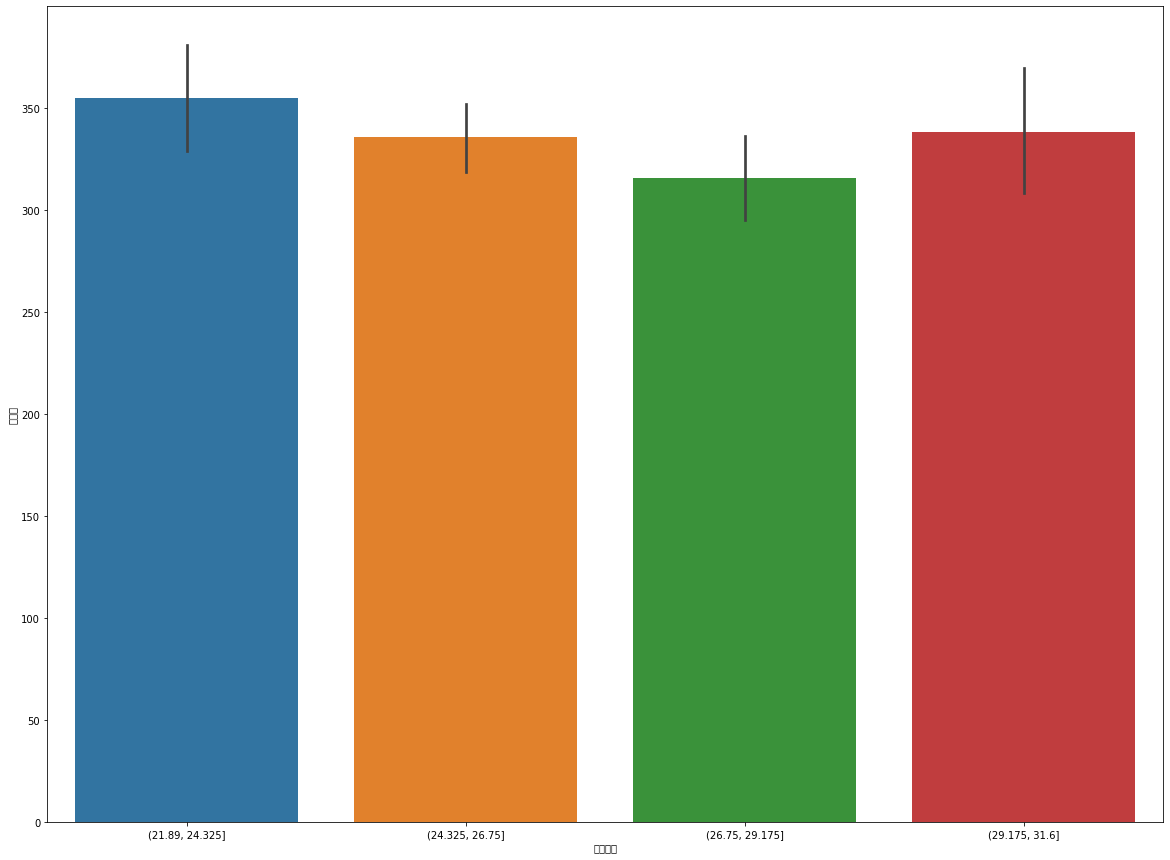

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44256 missing from current font.
 

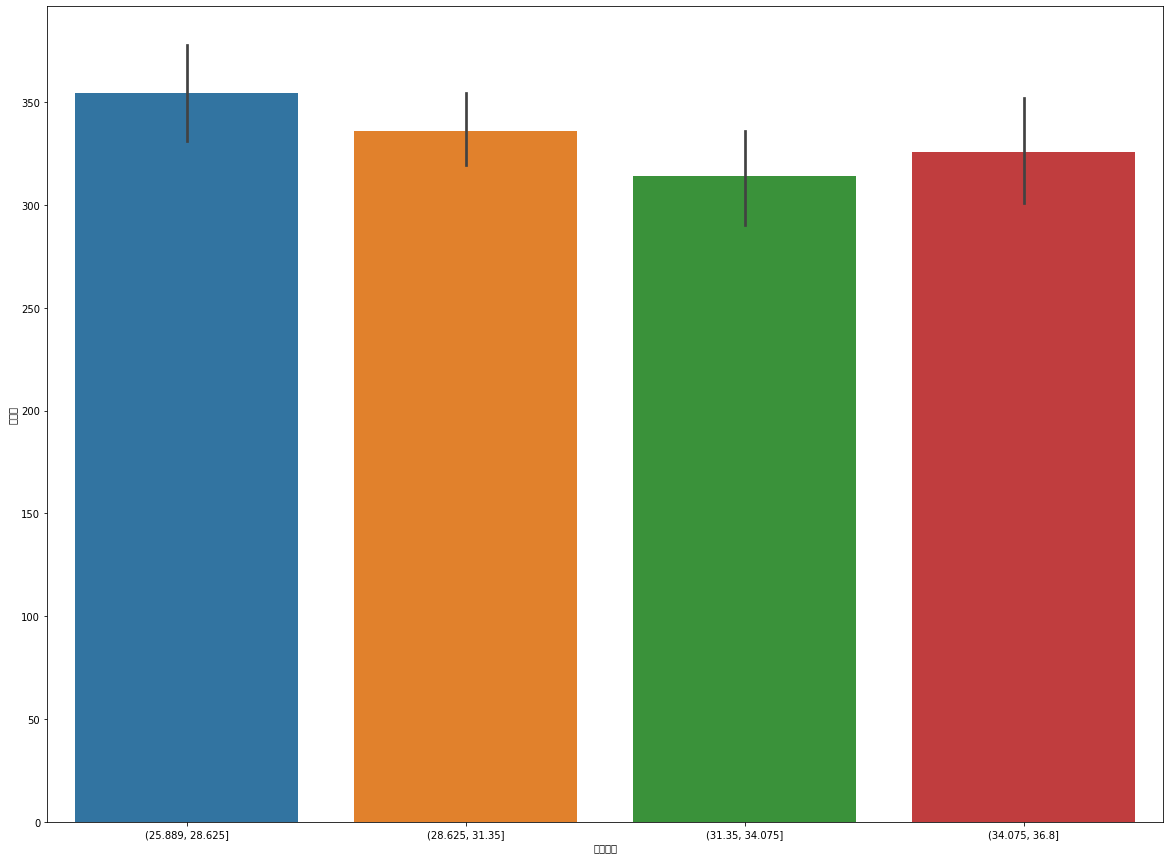

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51200 missing from current font.
 

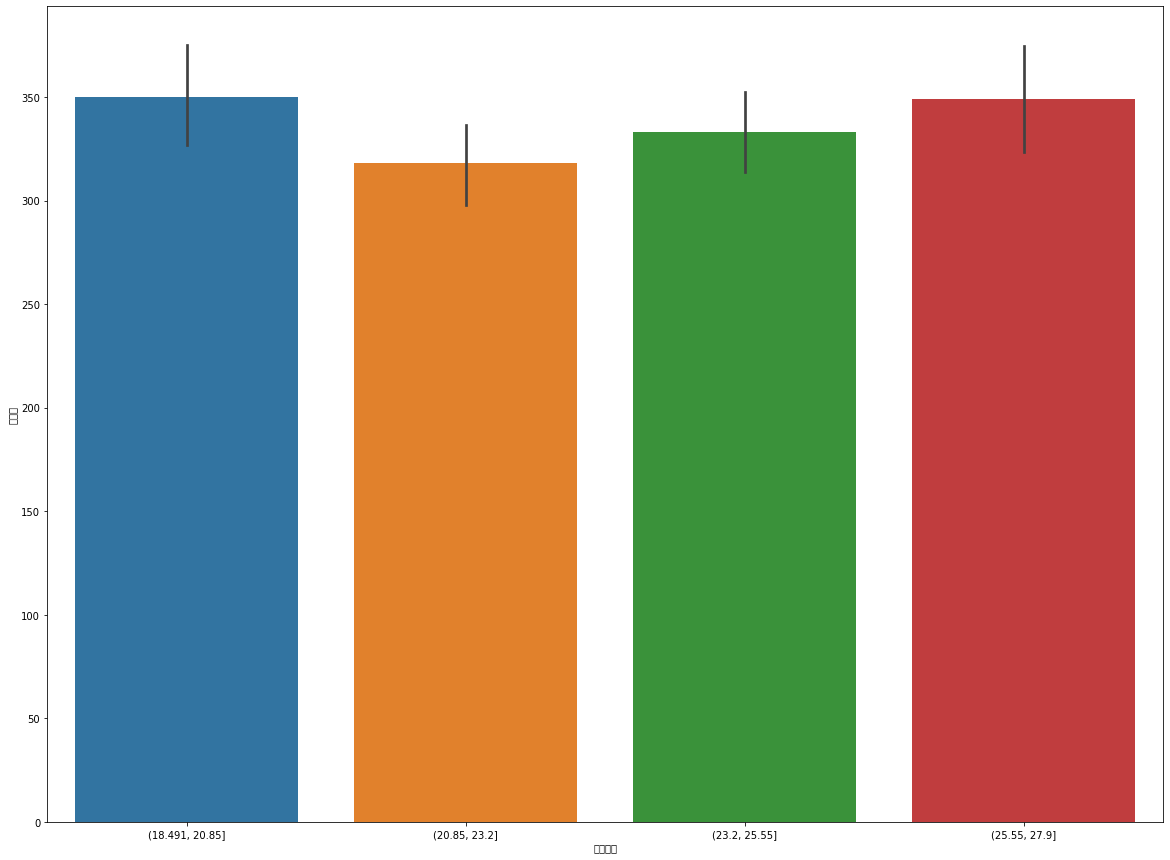

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  f

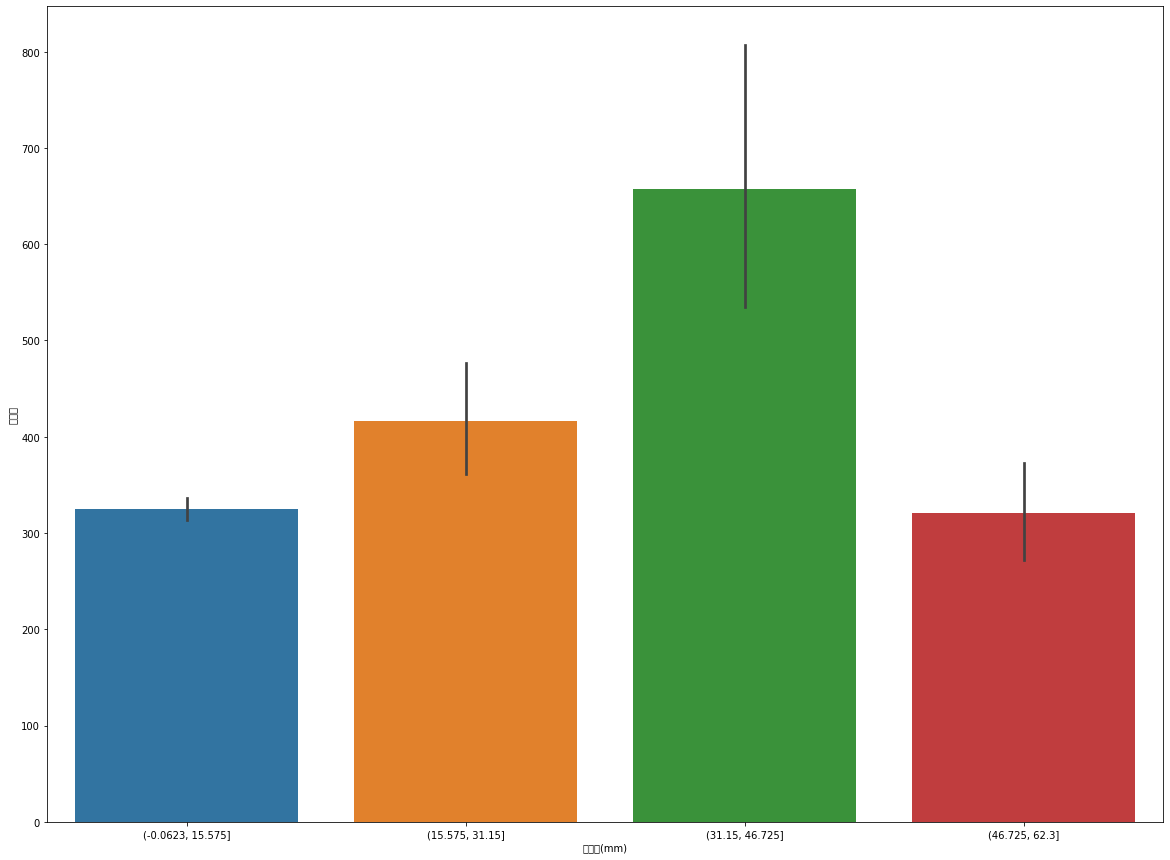

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49444 missing from current font.
  f

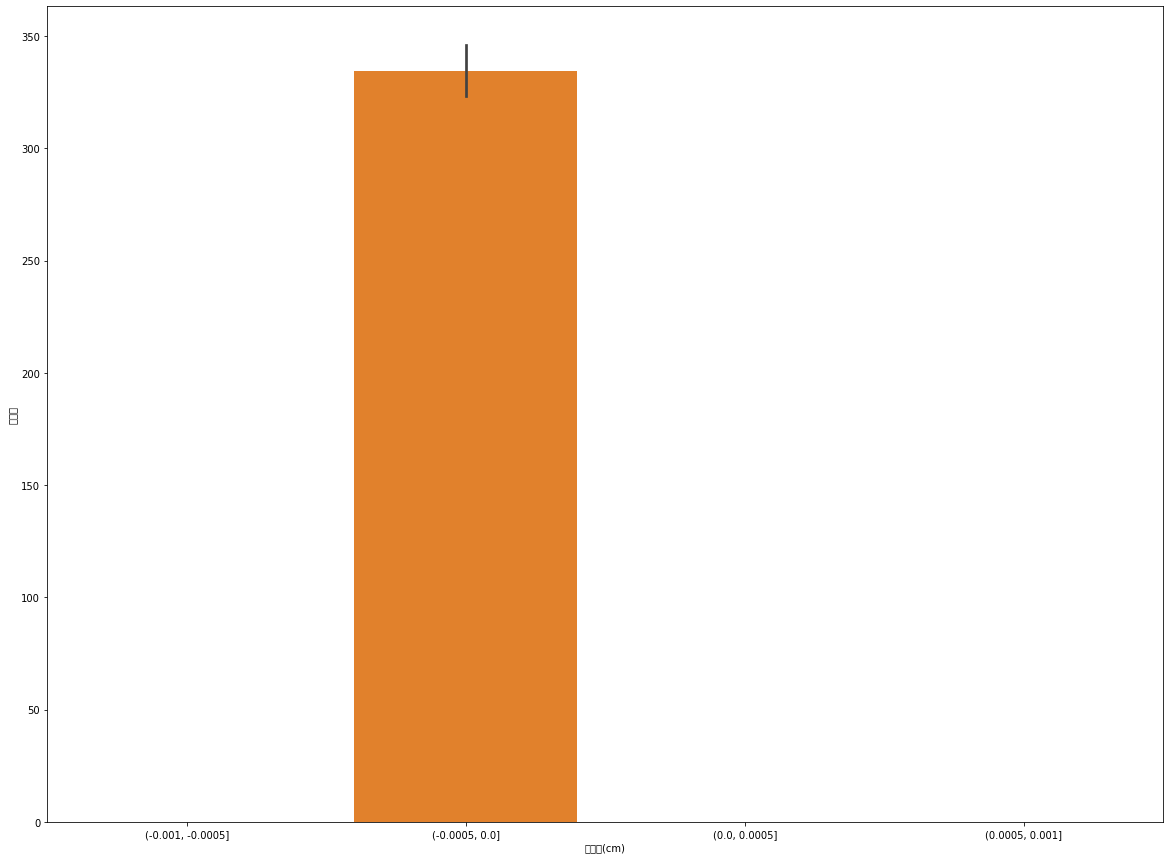

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44512 missing from current font.
 

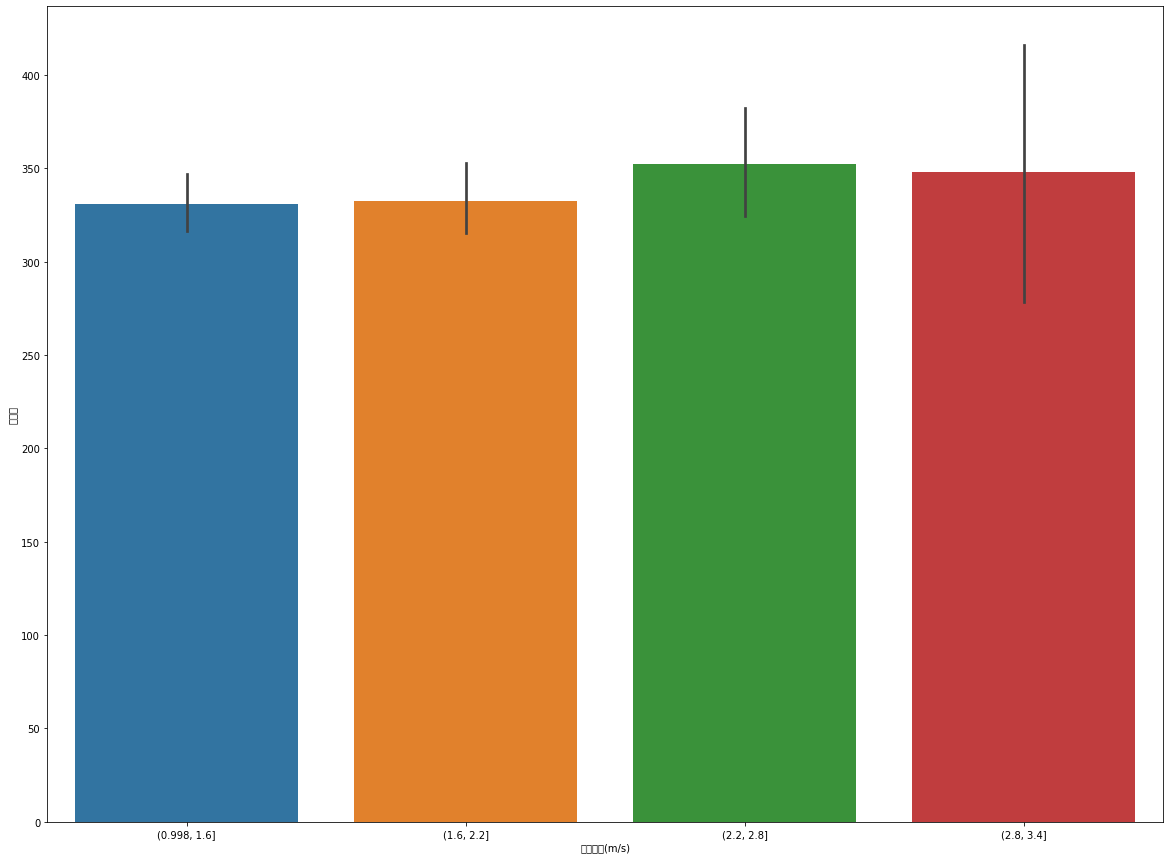

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44512 missing from current font.
 

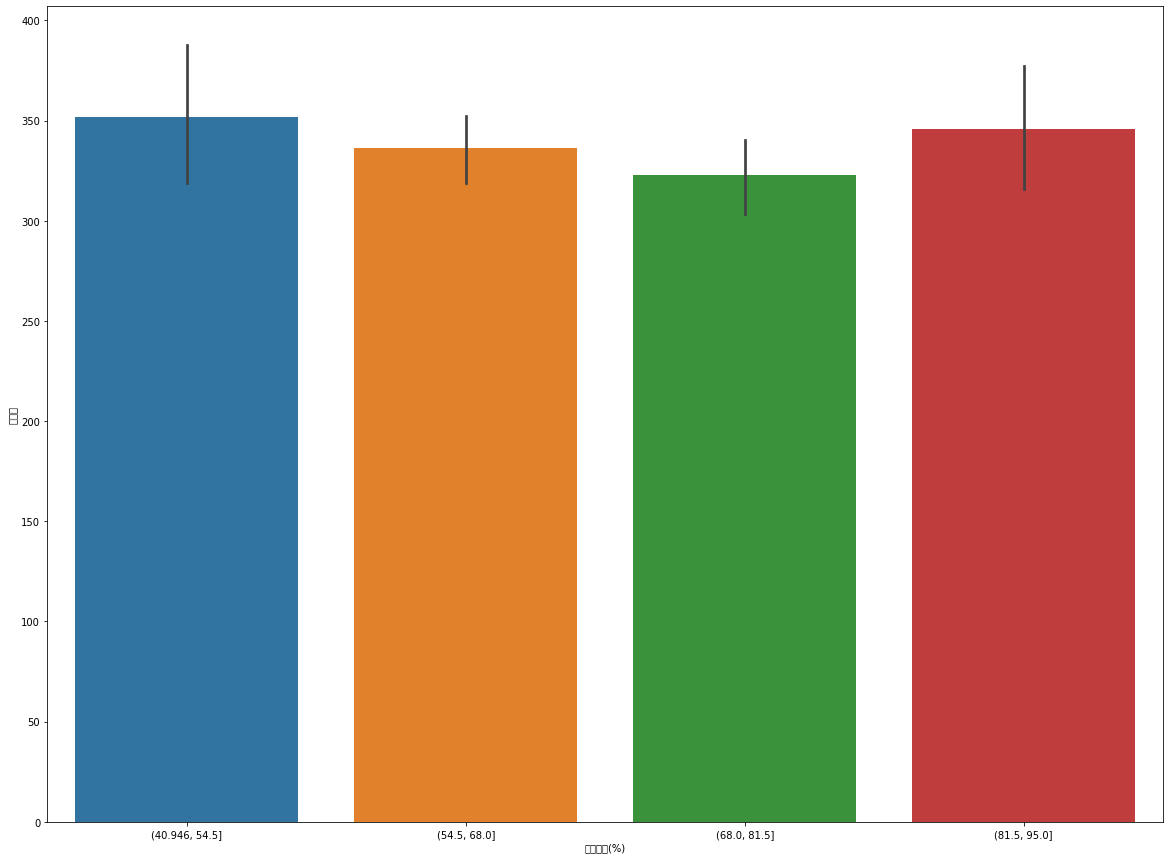

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  f

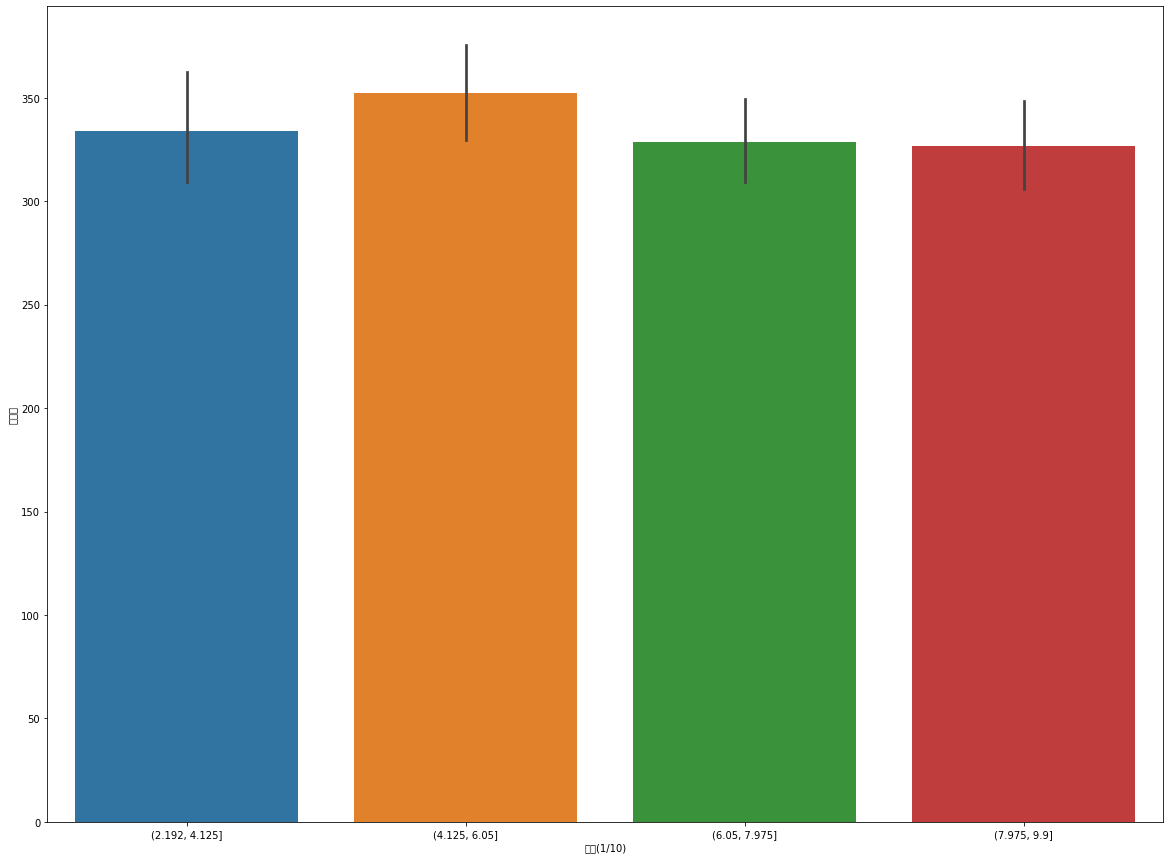

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51312 missing from current font.
 

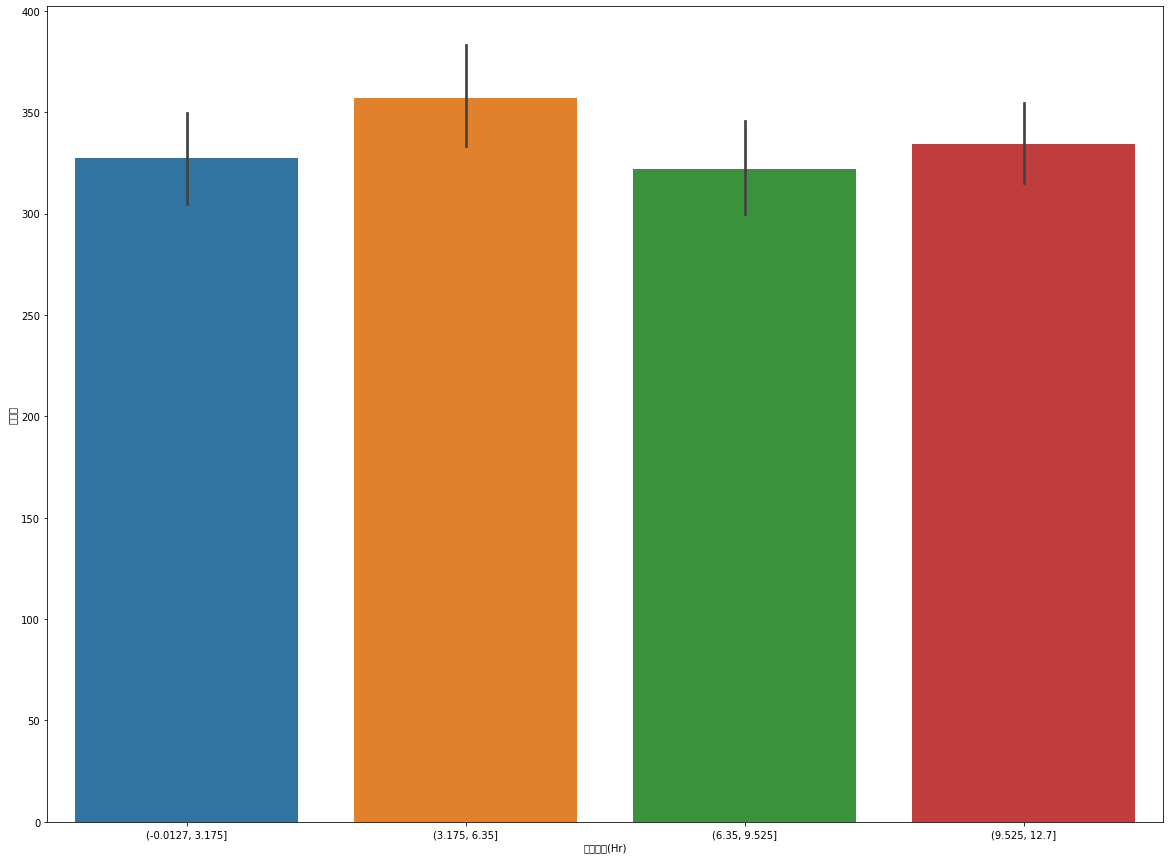

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
 

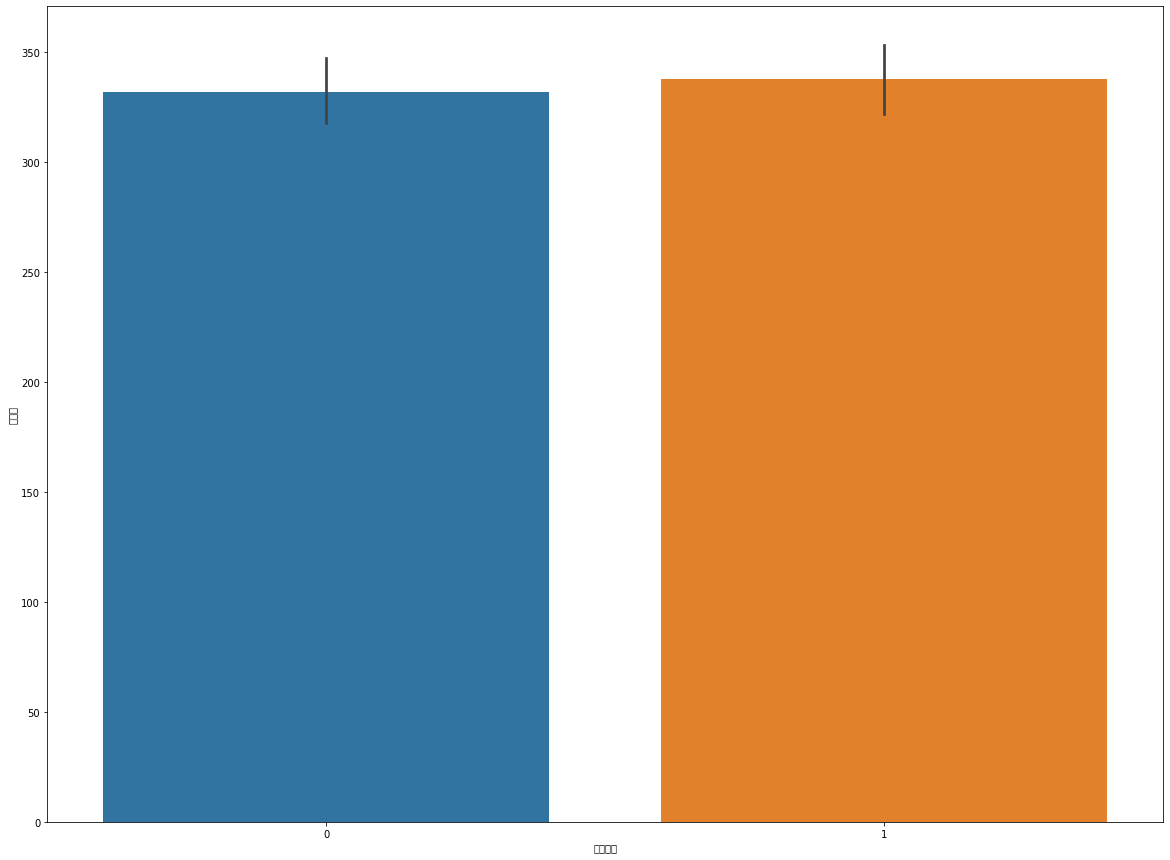

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45576 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45576 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47924 missing from current font.
  f

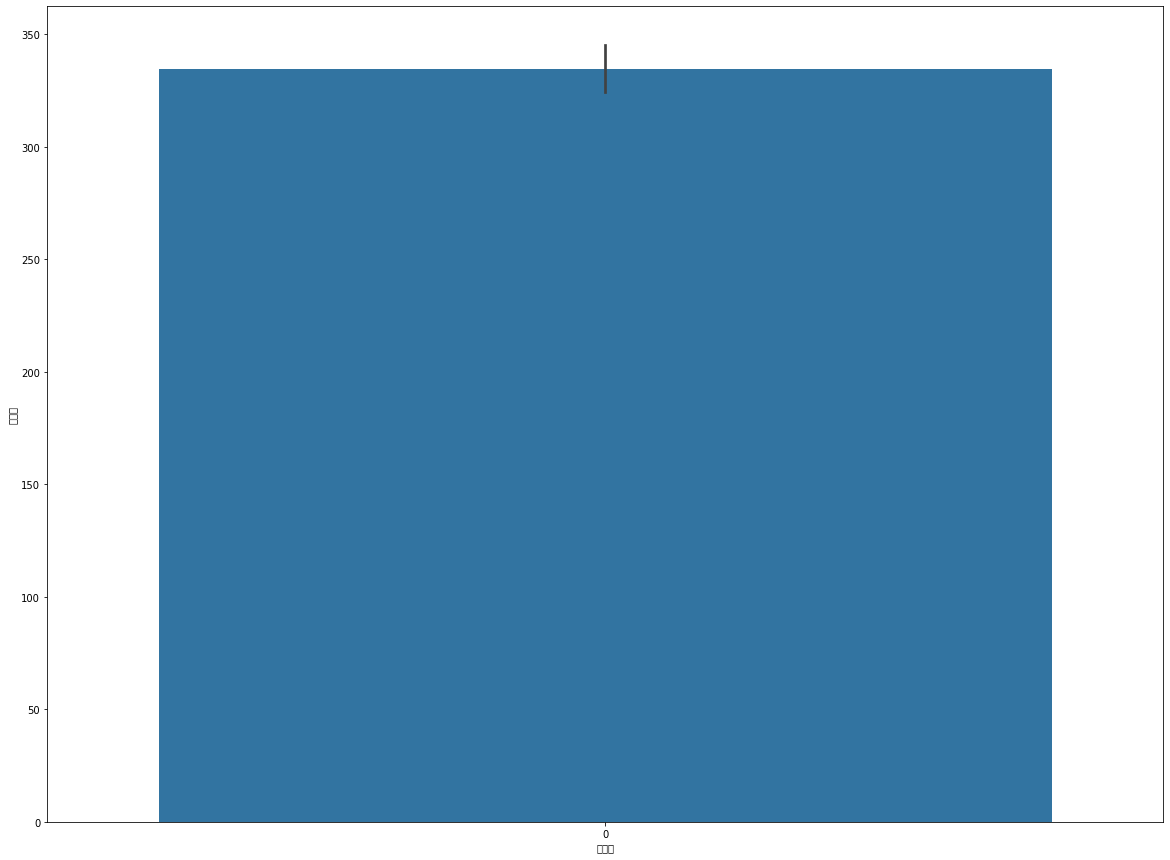

In [539]:
for col in visual_columns:
    sns.barplot(x=col, y="주문량", data=seoul_data)
    #plt.savefig(f'./날씨그래프/{col[:4]}.png') # 그래프 저장
    plt.show()

In [540]:
'''
# 요일성을 제거하고 특정 월에 대해서만 시각화
seoul_data["월"]=pd.to_datetime(seoul_data["방송일시"]).dt.month
a = seoul_data.loc[((seoul_data["요일"]!=5)&(seoul_data["요일"]!=6))&(seoul_data["월"]==7),:]
a["범주_습도"]=pd.cut(a["평균습도(%)"],4)
sns.barplot(x="범주_습도", y="주문량", data=a)
'''

'\n# 요일성을 제거하고 특정 월에 대해서만 시각화\nseoul_data["월"]=pd.to_datetime(seoul_data["방송일시"]).dt.month\na = seoul_data.loc[((seoul_data["요일"]!=5)&(seoul_data["요일"]!=6))&(seoul_data["월"]==7),:]\na["범주_습도"]=pd.cut(a["평균습도(%)"],4)\nsns.barplot(x="범주_습도", y="주문량", data=a)\n'

In [541]:
display(seoul_data.iloc[:,9:12].corr())
display(busan_data.iloc[:,9:12].corr())
display(gang_data.iloc[:,9:12].corr())

주문량        요일         시
주문량  1.000000  0.017263 -0.098928
요일   0.017263  1.000000 -0.021874
시   -0.098928 -0.021874  1.000000

주문량        요일         시
주문량  1.000000  0.017263 -0.098928
요일   0.017263  1.000000 -0.021874
시   -0.098928 -0.021874  1.000000

주문량        요일         시
주문량  1.000000  0.017263 -0.098928
요일   0.017263  1.000000 -0.021874
시   -0.098928 -0.021874  1.000000

- 예보 데이터

In [599]:
 # 범주 시각화 함수
def visual(col):
    global a
    # 토,일 제외함으로써 요일성 제외
    a = train_1.loc[(train_1["요일"]!=5)&(train_1["요일"]!=6),:] 
    # 연속형 데이터를 범주형으로 변경
    a[f"범주_{col}"]=pd.cut(a[col],3) 
    sns.barplot(x=f"범주_{col}",y="주문량", data=a)
    plt.show()

In [569]:
fc_prop = pd.read_csv("./날씨예보/서울날씨/강수확률.csv")
fc_amount = pd.read_csv("./날씨예보/서울날씨/6시간 강수량.csv") 
fc_sky = pd.read_csv("./날씨예보/서울날씨/하늘상태.csv")
fc_top = pd.read_csv("./날씨예보/서울날씨/일최고기온.csv")
fc_bottom = pd.read_csv("./날씨예보/서울날씨/일최저기온.csv")

In [572]:
forecast_data = {"강수확률":fc_prop, "강수량":fc_amount,"하늘상태":fc_sky, "일최고기온":fc_top, "일최저기온":fc_bottom}

In [573]:
forecast = pd.DataFrame()

for name, fcdata in forecast_data.items():
    amount_list=[]
    cycle = (fcdata.shape[0])//365 # 하루 관측량
    for i in range(365):
        day_weather = fcdata.iloc[i*cycle:(i+1)*cycle,-1].mean()
        amount_list.append(day_weather)
    forecast[name]=amount_list
                 

In [583]:
# 31일+28일+31일+30일+31일+14일 = 165일
# 16일+31일+31일 = 78일
forecast = forecast.iloc[165:243]

In [593]:
# 날짜 칼럼 추가
forecast["날짜"]=train["날짜"].unique()

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [594]:
train_1 = data.copy()
train_1 = train_1.merge(forecast, on='날짜')

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missi

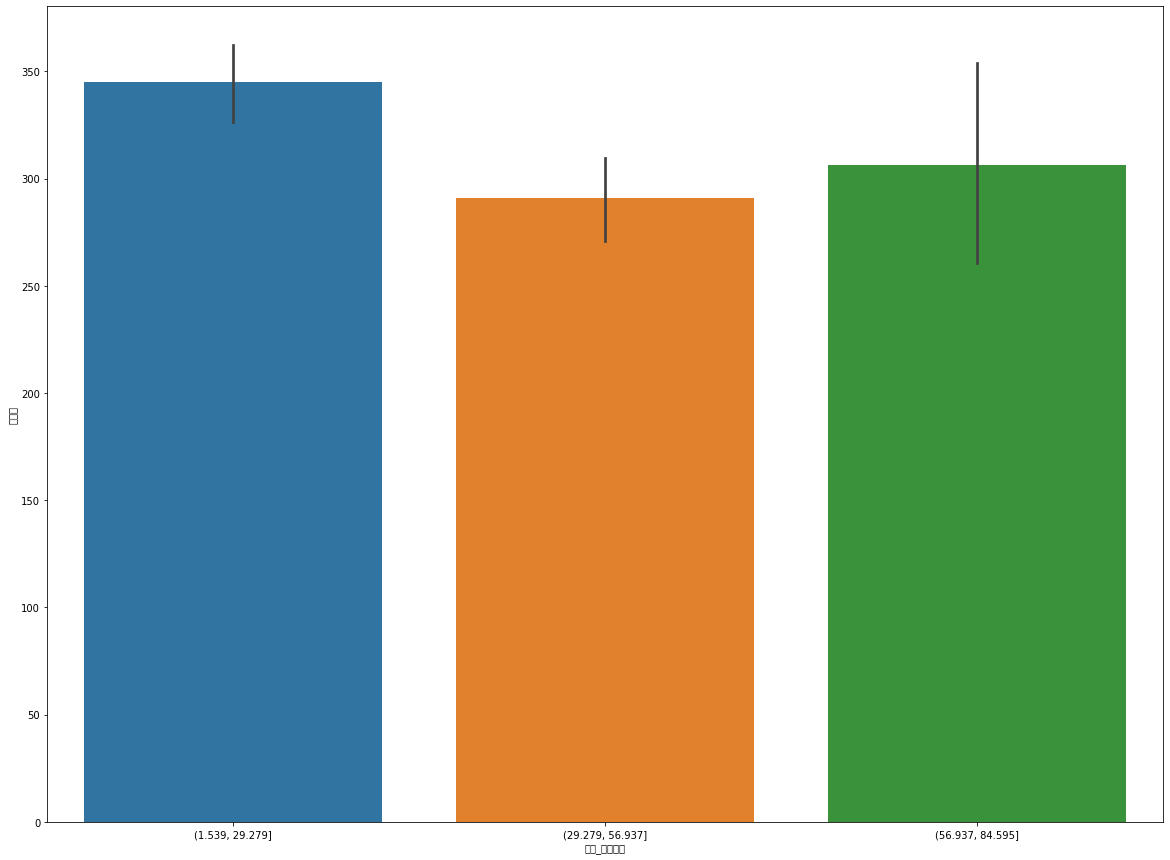

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missi

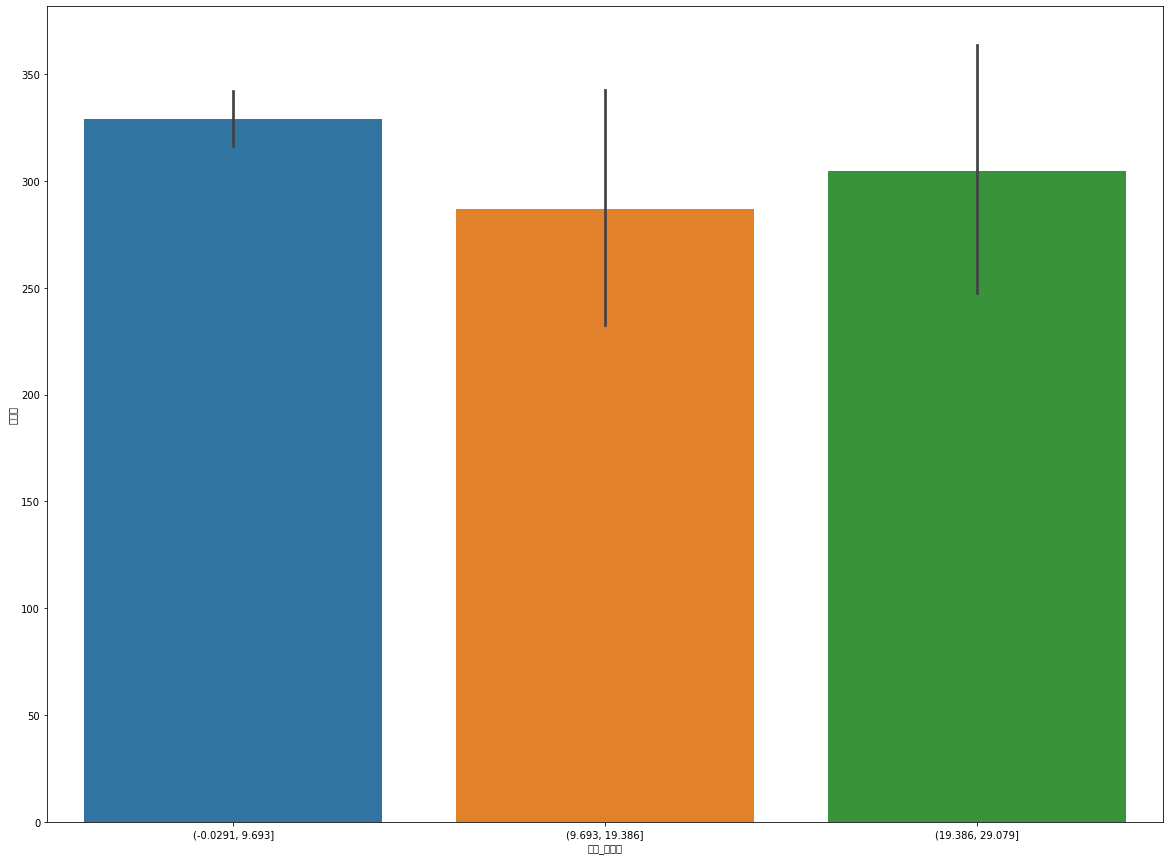

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45720 missi

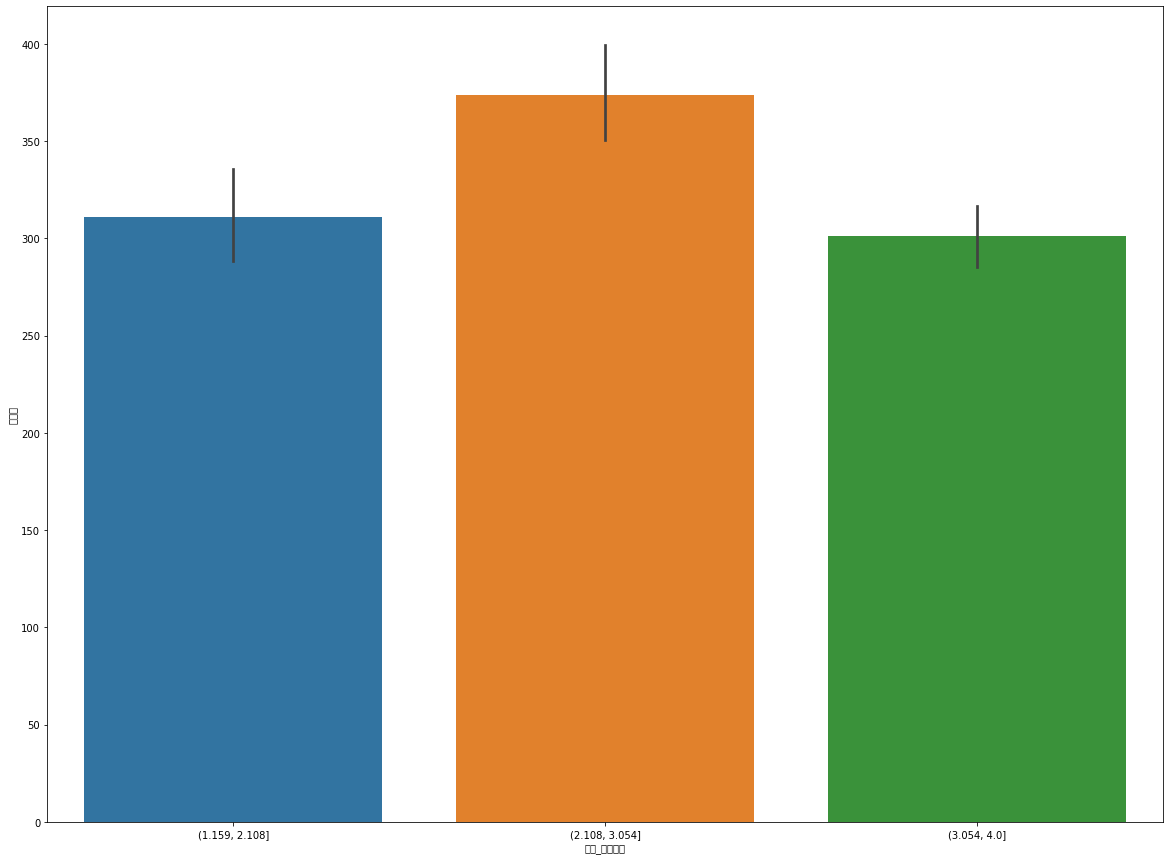

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missi

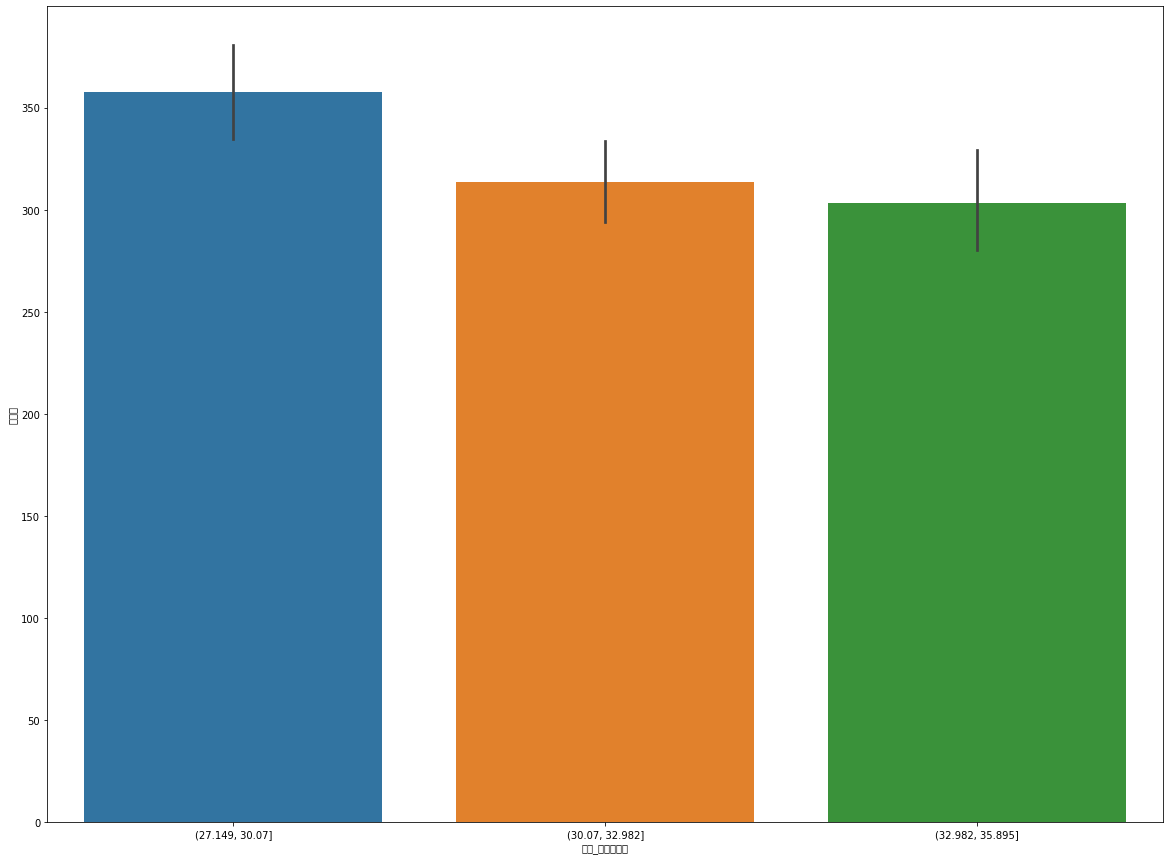

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missi

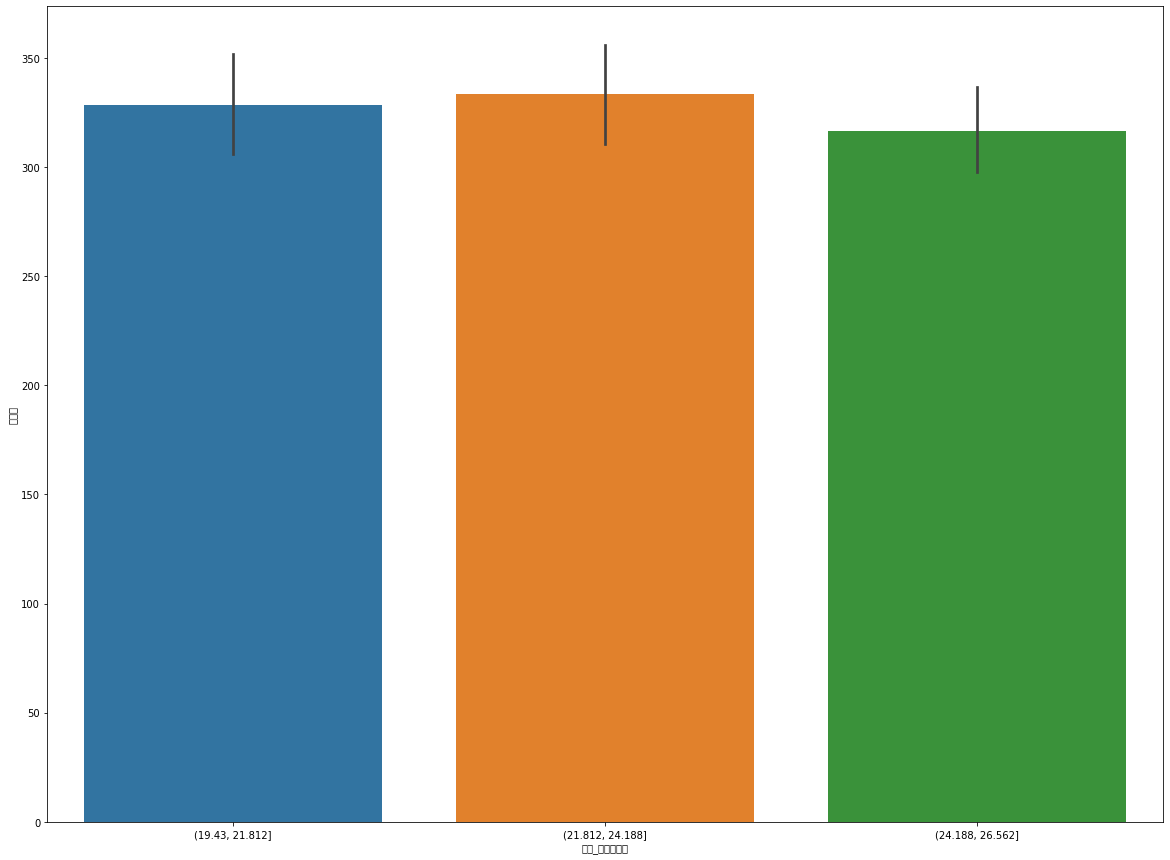

In [600]:
for name in forecast_data.keys():
    visual(name)

## 미세먼지

In [542]:
munji = pd.read_excel('./munji/2019미세먼지.xlsx')
pop_tot = pd.read_excel('./munji/2019총인구비율(수정).xlsx')
pop_w = pd.read_excel('./munji/2019여성인구비율.xlsx')
pop_m = pd.read_excel('./munji/2019남자인구비율.xlsx')

In [543]:
#먼지DF, 인구DF주면 가중치먼지 계산해서 돌려줌

def weighted_munji(munji_data,population_data): 
    weighted_df = pd.DataFrame()
    weighted_df = pd.DataFrame().reindex_like(munji_data)
    for i in range(len(munji_data.index)):
        for j in range(len(munji_data.columns)):
            weighted_df.iloc[i][j] = munji_data.iloc[i][j]*population_data.iloc[i][j]
    return weighted_df

In [544]:
#모든 카테고리와의 상관계수 결과 반환해줌
def cor_with_categories(data): 
    results = []
    results.append(stats.linregress(month_침구,data.iloc[month_침구.index-1]))
    results.append(stats.linregress(month_가구,data.iloc[month_가구.index-1]))
    results.append(stats.linregress(month_건강기능,data.iloc[month_건강기능.index-1]))
    results.append(stats.linregress(month_농수축,data.iloc[month_농수축.index-1]))
    results.append(stats.linregress(month_생활용품,data.iloc[month_생활용품.index-1]))
    results.append(stats.linregress(month_속옷,data.iloc[month_속옷.index-1]))
    results.append(stats.linregress(month_의류,data.iloc[month_의류.index-1]))
    results.append(stats.linregress(month_이미용,data.iloc[month_이미용.index-1]))
    results.append(stats.linregress(month_잡화,data.iloc[month_잡화.index-1]))
    results.append(stats.linregress(month_주방,data.iloc[month_주방.index-1]))
    results.append(stats.linregress(month_침구,data.iloc[month_침구.index-1]))
    print('침구,가구,건강기능,농수축,생활용품,속옷,의류,이미용,잡화,주방,침구')
    
    return results

1) 총 인구수 고려

In [545]:
munji_df = munji.set_index('지역날짜')
pop_tot_df = pop_tot.set_index('행정구역(시군구)별')

In [546]:
tot_weight_munji = weighted_munji(munji_df, pop_tot_df)

In [547]:
tot_munji_df = tot_weight_munji.sum()
tot_munji_df

2019. 01    24.837347
2019. 02    22.833675
2019. 03    27.869383
2019. 04    13.450065
2019. 05    18.012409
2019. 06    12.980445
2019. 07    11.941034
2019. 08    11.264766
2019. 09     8.645412
2019. 10    10.491966
2019. 11    13.959968
2019. 12    18.588743
dtype: float64

In [548]:
MonthItemGroup = train.groupby(['상품군','월']).mean()

In [549]:
# 6,7,8 월만 전체인구수가중한것과 건강기능 상관계수
stats.linregress(tot_munji_df[5:8], MonthItemGroup.xs('health')['주문량'])

LinregressResult(slope=99.30943820204276, intercept=-820.7029264126979, rvalue=0.9144962032725028, pvalue=0.26517464159491627, stderr=43.93681513571076)

2) 여성 인구수 고려

In [550]:
pop_w_df = pop_w.set_index('행정구역(시군구)별')

In [551]:
woman_weight_munji = weighted_munji(munji_df, pop_w_df)

In [552]:
woman_munji_df = woman_weight_munji.sum()
woman_munji_df

2019. 01    12.484569
2019. 02    11.481677
2019. 03    14.014574
2019. 04     6.766506
2019. 05     9.061288
2019. 06     6.532986
2019. 07     6.008642
2019. 08     5.665599
2019. 09     4.347492
2019. 10     5.275934
2019. 11     7.020567
2019. 12     9.352337
dtype: float64

- 확인 필요

In [553]:
stats.linregress(woman_munji_df[5:8], MonthItemGroup.xs('health')['주문량'])

LinregressResult(slope=196.5989557714752, intercept=-815.9983069564603, rvalue=0.915102904851042, pvalue=0.2642183874640637, stderr=86.62709397289866)

3) 남녀 비율 조정해서 고려(홈쇼핑 이용 비율 8:2)

In [554]:
pop_m_df = pop_m.set_index('행정구역(시군구)별')

In [555]:
mix_weight_munji = 0.2*weighted_munji(munji_df, pop_m_df) +\
                    0.8*weighted_munji(munji_df, pop_w_df)

In [556]:
mix_munji_df = mix_weight_munji.sum()
mix_munji_df

2019. 01    12.458211
2019. 02    11.455741
2019. 03    13.982621
2019. 04     6.749916
2019. 05     9.039254
2019. 06     6.515881
2019. 07     5.993392
2019. 08     5.652313
2019. 09     4.337577
2019. 10     5.263954
2019. 11     7.004334
2019. 12     9.329150
dtype: float64

- 확인필요

## 월별/요일별

- 월별 주문량

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 50900 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51452 missing from current font

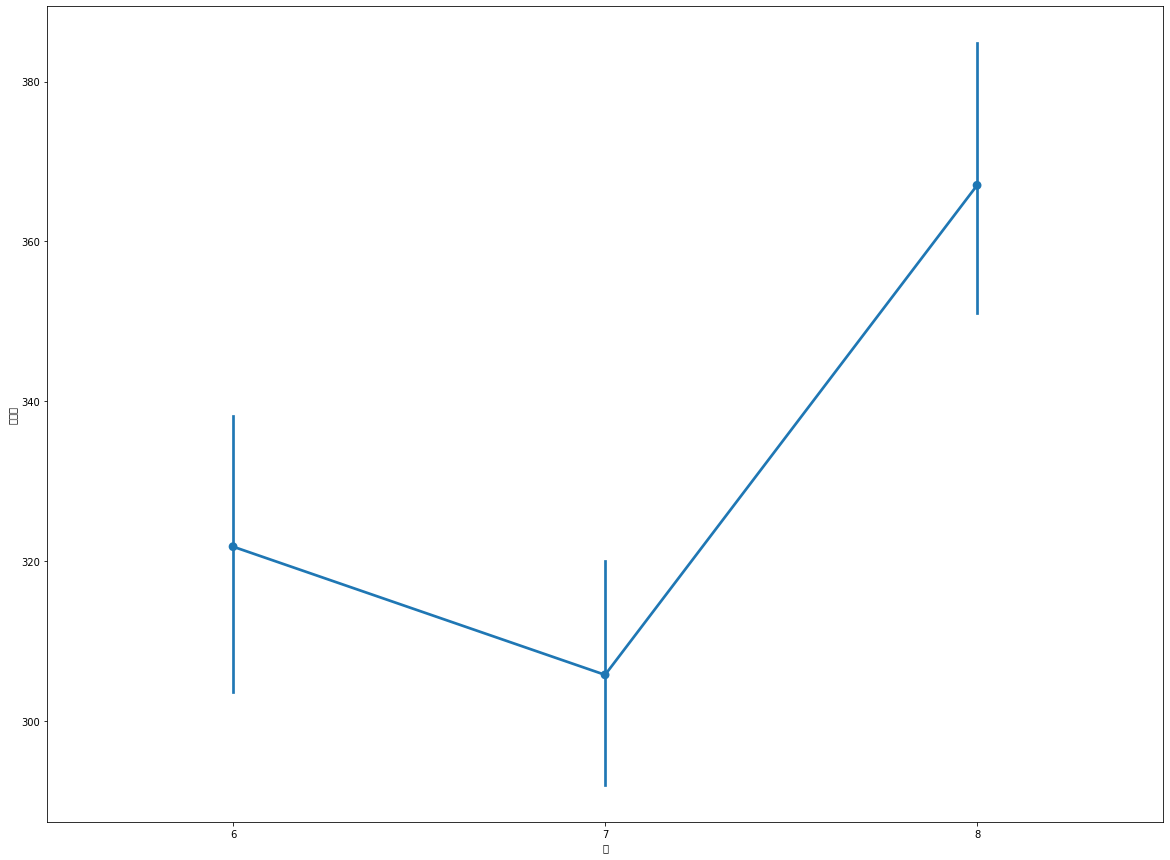

In [557]:
sns.pointplot(data=train,x="월",y="주문량")

- 요일별 주문량

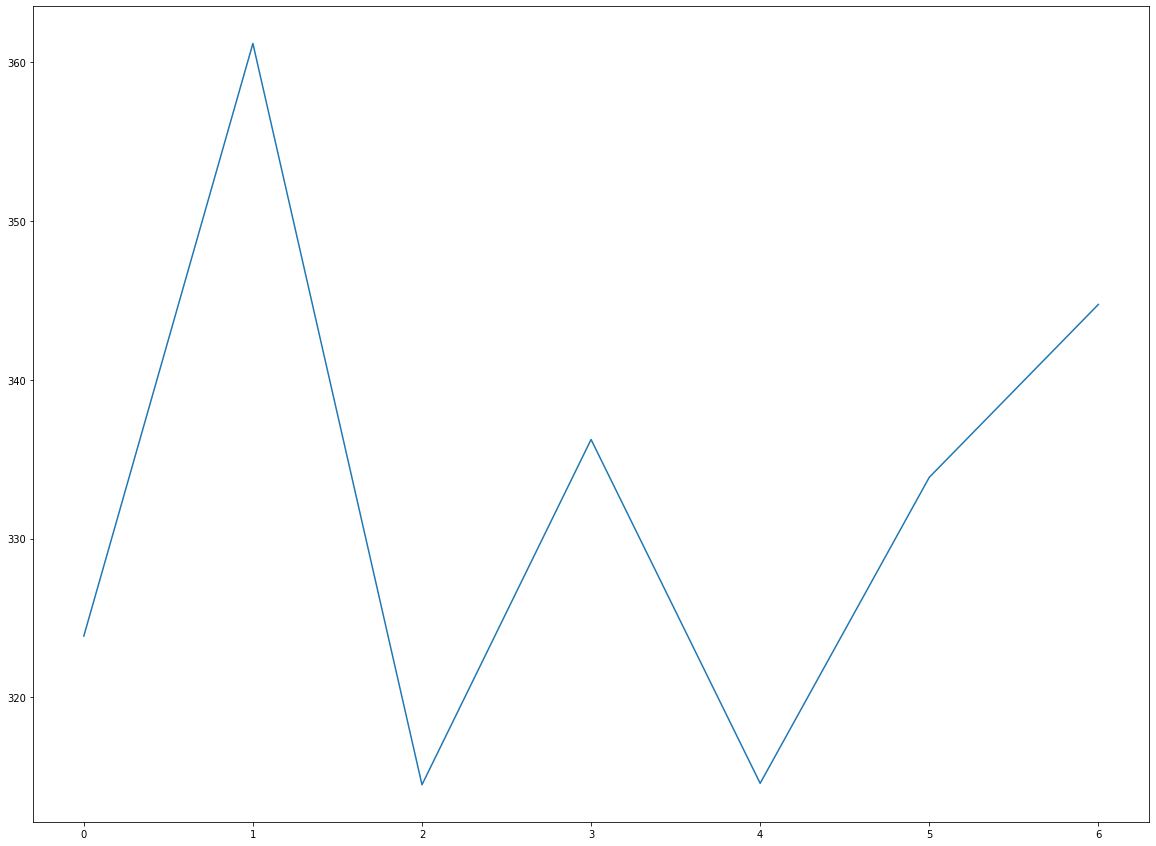

In [558]:
plt.plot(train.groupby("요일")["주문량"].sum()/train.groupby("요일")["주문량"].count())

In [559]:
(train.groupby("요일")["주문량"].sum()/train.groupby("요일")["주문량"].count()).describe()

count      7.000000
mean     332.715900
std       16.869934
min      314.504503
25%      319.230204
50%      333.862742
75%      340.498297
max      361.187054
Name: 주문량, dtype: float64

## 상품군/마더코드별

In [560]:
train['상품군'].value_counts()

living       1281
elec         1014
etc          1002
food          955
inner         878
cloth         818
furniture     461
life          430
bedding       282
beauty        216
health        176
Name: 상품군, dtype: int64

- 전체 만더코드별 주문량

In [561]:
mother_grouped = train.groupby('마더코드')
MomCodeGroup = mother_grouped.sum()['주문량']

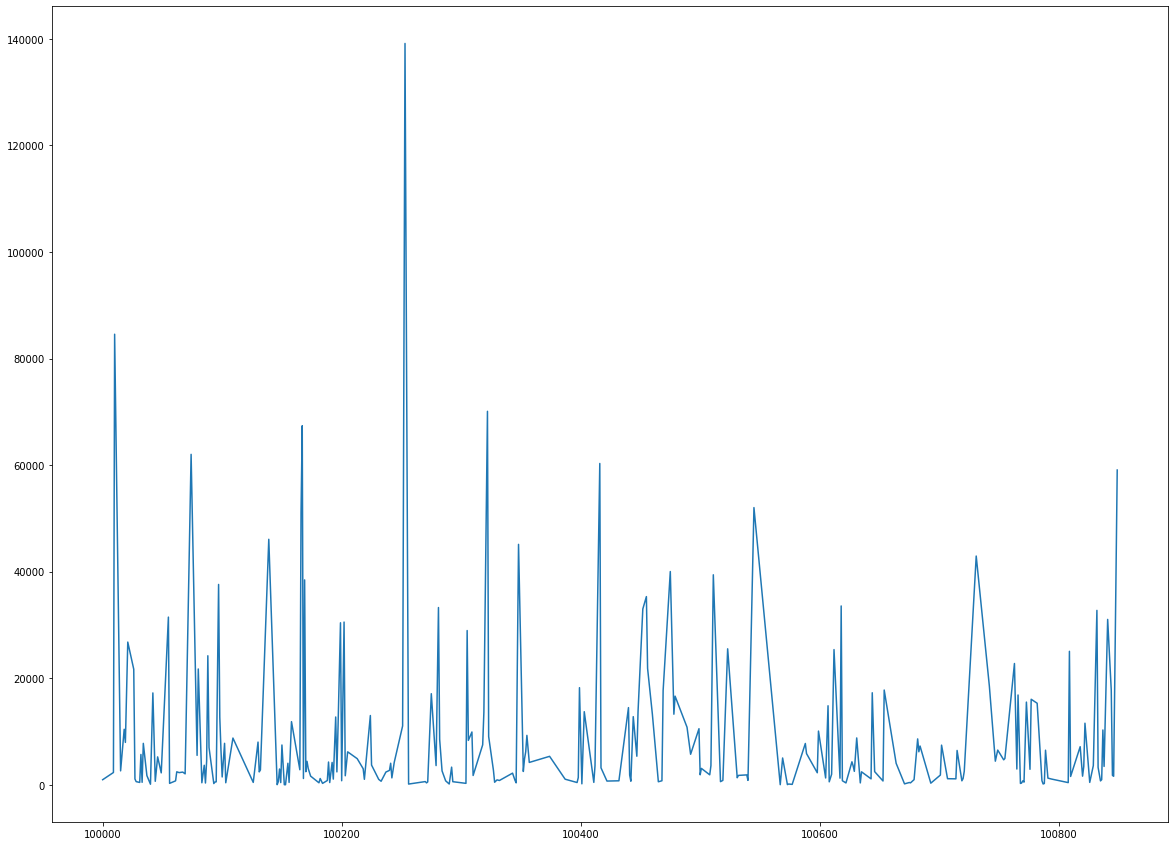

In [562]:
plt.plot(MomCodeGroup)

- 노출시간 대비 주문량 높은 마더코드

In [563]:
MomCodeGroup2 = train.groupby(['마더코드']).sum()

In [564]:
MomCodeGroup2['주문량/노출'] = MomCodeGroup2['주문량']/MomCodeGroup2['노출(분)']
MomCodeGroup2.sort_values('주문량/노출', ascending=False).head()

Unnamed: 0  노출(분)     상품코드    판매단가        취급액  요일    시           주문량  \
마더코드                                                                           
100492       75615   60.0   604461  149700  286104000   9   48   5733.547094   
100499      145080  120.0  1209006  239400  420256000  15  117  10532.731830   
100046      151203   60.0  1200756  185400  162001000  18   90   5242.750809   
100754       76092   60.0   606609  119700  187163000  15   39   4690.802005   
100323      151497  120.0  1208934  299400  452290000  21   99   9063.927856   

        holiday   월  ...       DATE  미세먼지(㎍/㎥)  오존(ppm)  이산화질소농도(ppm)  \
마더코드                 ...                                                
100492        0  24  ...   60572487      83.88    60.24       0.10620   
100499        0  48  ...  121144908     136.44    83.28       0.19428   
100046        0  48  ...  121144974     167.76   120.48       0.21240   
100754        0  24  ...   60572493      49.68    28.08       0.09552   
100323        0  48  ...  121144977     138.12    85.56       0.21396   

        일산화탄소농도(ppm)  아황산가스농도(ppm)  초미세먼지(㎍/㎥)  MONTH  HOUR     주문량/노출  
마더코드                                                                    
100492       0.06084         1.500     0.01080     24    48  95.559118  
100499       0.10164         2.532     0.02136     48   117  87.772765  
100046       0.12168         3.000     0.02160     48    90  87.379180  
100754       0.05016         1.152     0.01020     24    39  78.180033  
100323       0.11016         2.520     0.02136     48    99  75.532732  

[5 rows x 47 columns]

In [566]:
topcode = list(MomCodeGroup2.sort_values('주문량/노출', ascending=False).index[:50])

- 상품군 내 마더코드별 주문량

In [352]:
multi_grouped = train.groupby(['상품군','마더코드'])
MultiGroup = multi_grouped['주문량'].sum()
MultiGroup = MultiGroup.reset_index()

In [353]:
item = list(set(MultiGroup['상품군']))

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45908 missing from current font.
 

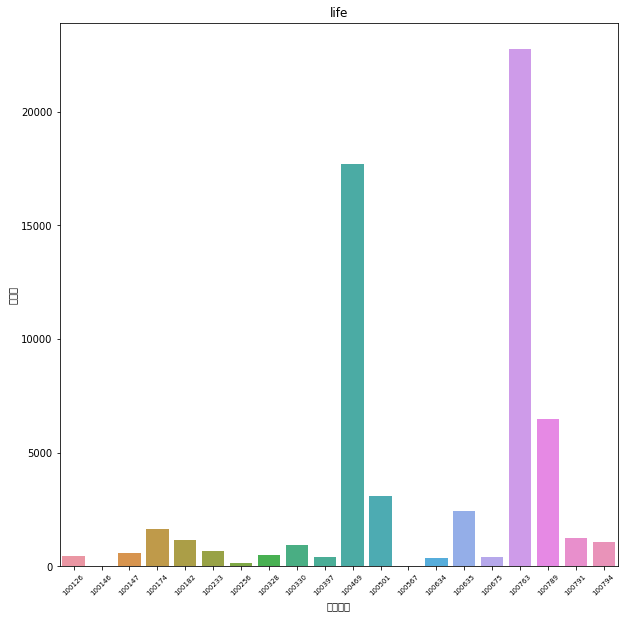

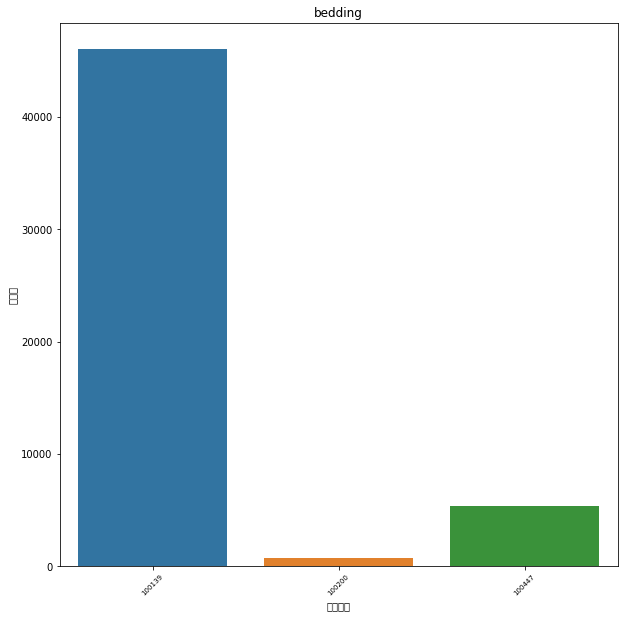

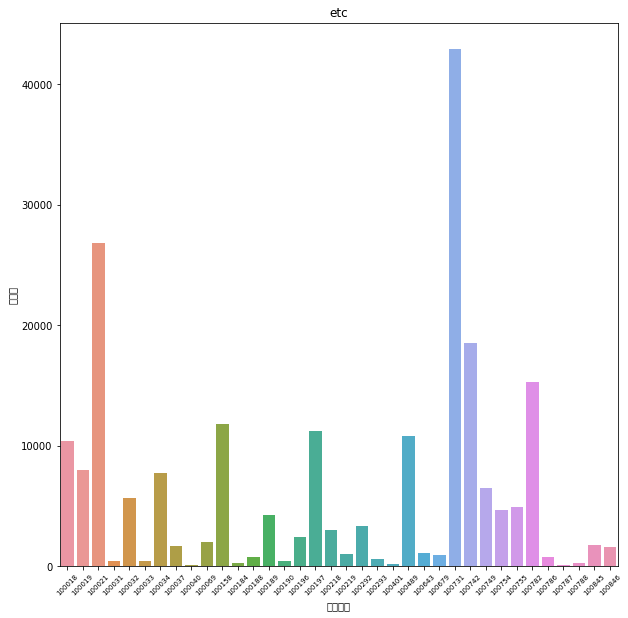

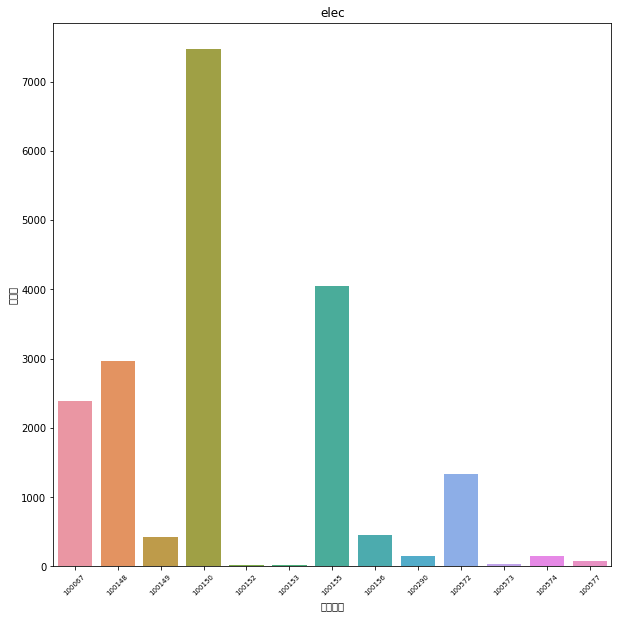

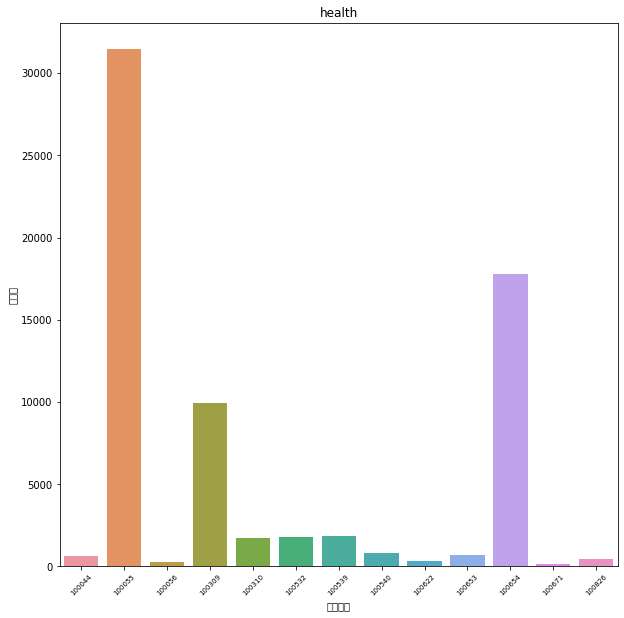

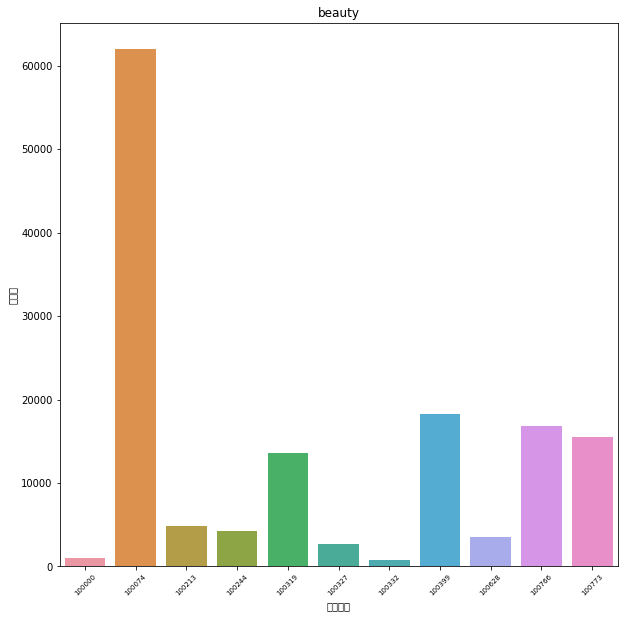

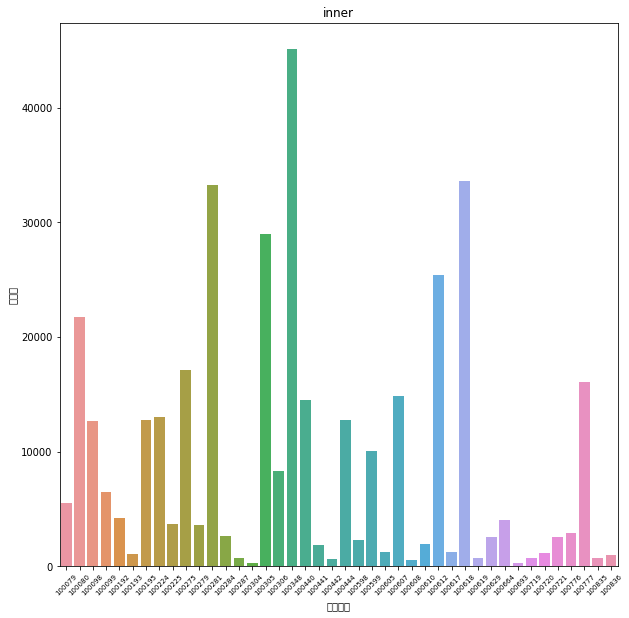

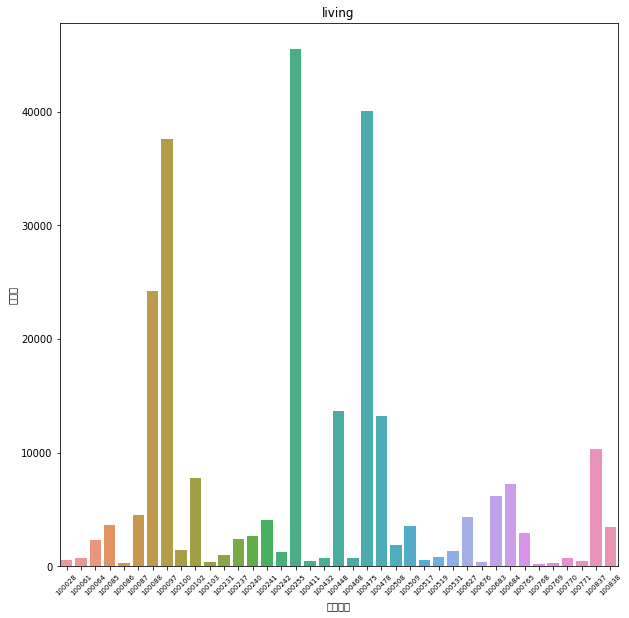

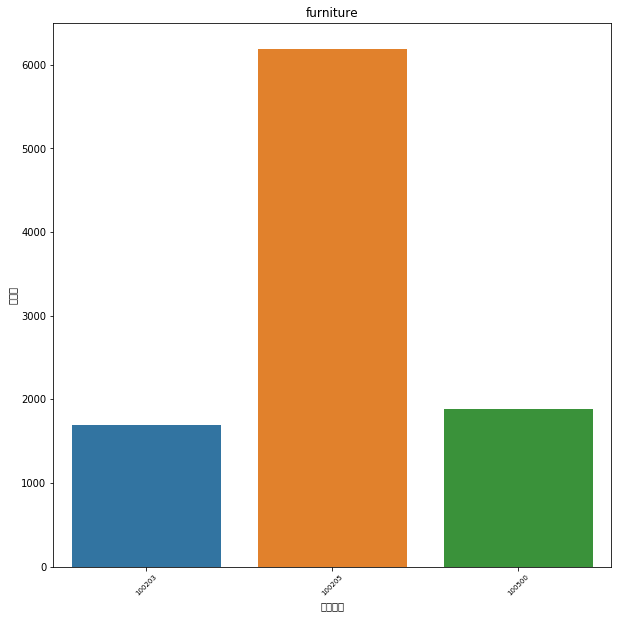

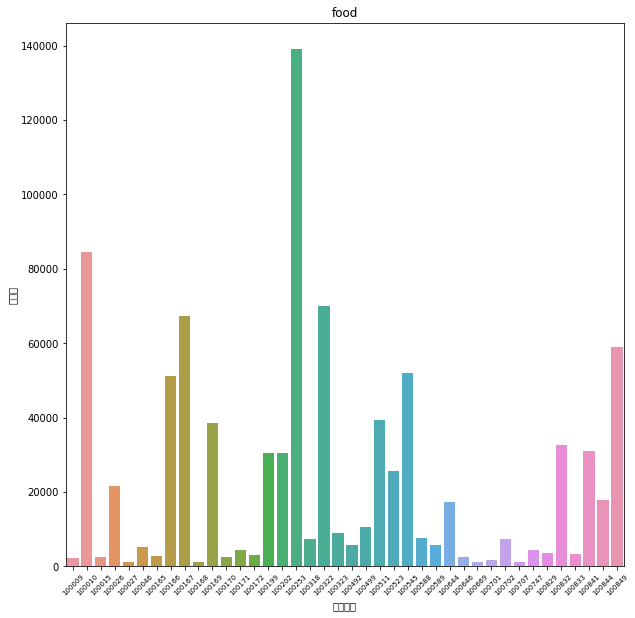

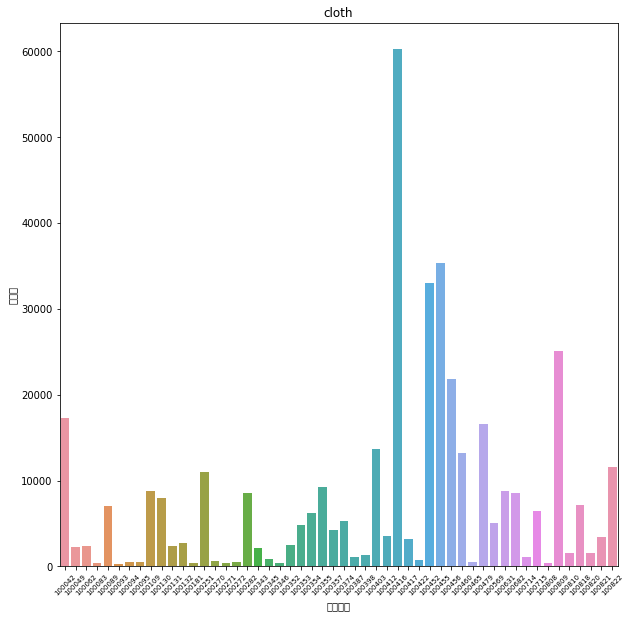

In [355]:
for i in item:
    plt.figure(figsize=(10,10))
    sns.barplot(data=MultiGroup[MultiGroup['상품군']==i], x='마더코드', y='주문량')
    plt.title(i)
    plt.xticks(rotation=45, size=7)

## 시간대별 + 상품군/마더코드별

- 시간대 상품군별 주문량

In [349]:
hour_grouped = train.groupby(['시','상품군'])
HourGroup = hour_grouped['주문량'].sum()
HourGroup = HourGroup.reset_index()

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49884 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51452 missing from current font

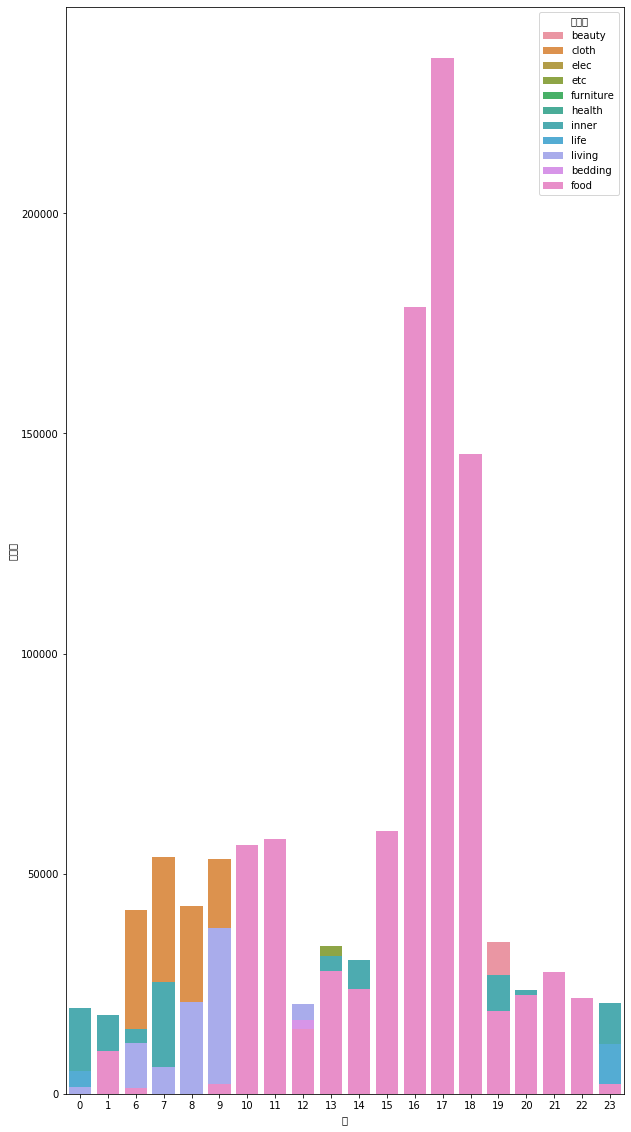

In [350]:
plt.figure(figsize=(10,20))
sns.barplot(data=HourGroup, x='시', y='주문량', hue='상품군', dodge=False)

## 판매단가

In [362]:
np.corrcoef(train['주문량'],train['판매단가'])

array([[ 1.        , -0.39377501],
       [-0.39377501,  1.        ]])

In [363]:
np.corrcoef(train['주문량'],np.log(train['판매단가']))

array([[ 1.        , -0.61081947],
       [-0.61081947,  1.        ]])

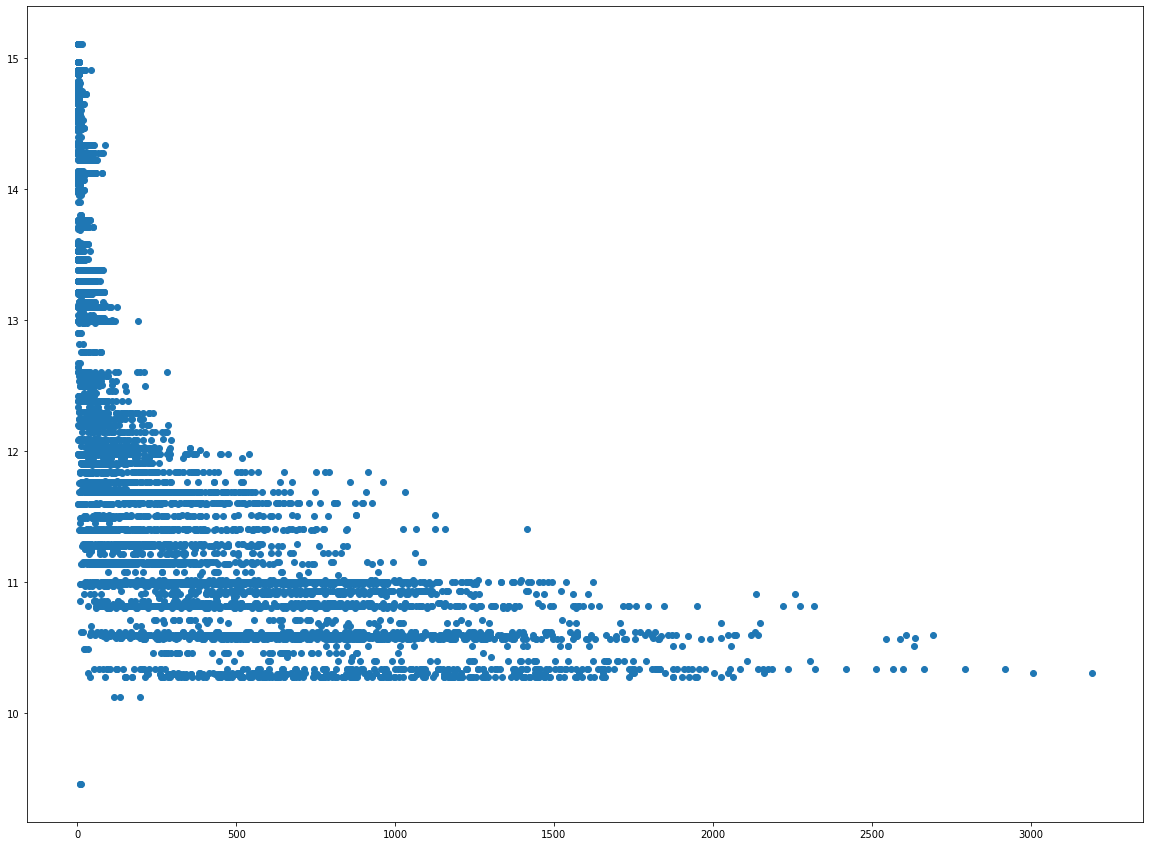

In [358]:
plt.scatter(train['주문량'], np.log(train['판매단가']))